# 1. Incidents Data

We need incidents from 2015 to 2019.

In [ ]:
import pandas as pd

In [ ]:
# ANTONY CODE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#1 UNCOMMENT who you are and #2 UNCOMMENT your working folder, if you use the drive.mount, then should be the same for everyone
userfolder = '/content/drive/MyDrive/Capstone - Data Science'  # Antony
#name='Antony'

#userfolder = '/content/drive/MyDrive/Capstone - Data Science' # Karen
#name = 'Karen'

#userfolder = '/content/drive/MyDrive/Capstone - Data Science' # Yue
name = 'Yue'

#userfolder = '/content/drive/MyDrive/Capstone - Data Science' # Zachary
#name = 'Zachary'



# Below should be same for all, dont edit, unless you add files
data_file_paths = {}
data_file_paths['incidence-2005-2014'] = userfolder + '/Fire Data/Incidents_donneesouvertes-interventions-sim-2005-2014.csv'
data_file_paths['incidence-2015-2021'] = userfolder + '/Fire Data/Incidents_donneesouvertes-interventions-sim.csv'
data_file_paths['casernes'] = userfolder +  '/Fire Data/casernes.csv'
data_file_paths['properties'] = userfolder + '/Data Processing/Output/Alteryx Output/Property Assessment_Processed_with_Geo_Info.csv' # this is the file modified in alteryx by Yue
data_file_paths['crimes'] = userfolder + '/Crime Data/Crime_interventionscitoyendo.csv'
data_file_paths['311_2014_2015'] = userfolder +'/311 Data/requetes311_2014_2015.csv'  
data_file_paths['311'] = userfolder +'/311 Data/requetes311.csv'


In [ ]:
# Load data from 2005 to 2014
path1 = data_file_paths['incidence-2005-2014']
incidents_part1 = pd.read_csv(path1, parse_dates = ["CREATION_DATE_TIME"], infer_datetime_format = True)

In [ ]:
incidents_part1.duplicated().sum()

0

In [ ]:
incidents_part1.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,LATITUDE,LONGITUDE,NOMBRE_UNITES
0,1,2005-01-01 00:03:47,Inondation,Sans incendie,18,Montréal-Nord,Montréal-Nord,21,45.620274,-73.619956,1.0
1,2,2005-01-01 00:03:56,Alarme privé ou locale,Alarmes-incendies,10,Montréal,Ville-Marie / Parc Jean-Drapeau / Centre-Sud,18,45.494087,-73.582587,7.0
2,3,2005-01-01 00:03:57,Alarme privé ou locale,Alarmes-incendies,72,Saint-Laurent,St-Laurent,13,45.484406,-73.693038,6.0
3,4,2005-01-01 00:05:01,Inondation,Sans incendie,13,Montréal,Mercier / Hochelaga-Maisonneuve,23,45.541383,-73.545944,1.0
4,5,2005-01-01 00:06:20,Inondation,Sans incendie,18,Montréal-Nord,Montréal-Nord,21,45.611304,-73.632440,1.0


In [ ]:
incidents_part1.tail()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,LATITUDE,LONGITUDE,NOMBRE_UNITES
908481,126146,2014-12-31 23:40:26,Premier répondant,Premier répondant,40,Montréal,Mercier / Hochelaga-Maisonneuve,12,45.606929,-73.519140,1.0
908482,126147,2014-12-31 23:47:51,Premier répondant,Premier répondant,53,Beaconsfield,Indéterminé,2,45.425597,-73.881288,1.0
908483,126148,2014-12-31 23:49:35,Premier répondant,Premier répondant,3,Montréal,Sud-Ouest,8,45.494491,-73.556565,1.0
908484,126149,2014-12-31 23:57:42,Premier répondant,Premier répondant,5,Montréal,Ville-Marie,10,45.510666,-73.564068,1.0
908485,126150,2014-12-31 23:58:25,Premier répondant,Premier répondant,17,Montréal,Montréal-Nord,5,45.591743,-73.649174,1.0


In [ ]:
incidents_part1.shape

(908486, 11)

In [ ]:
incidents_part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908486 entries, 0 to 908485
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   INCIDENT_NBR        908486 non-null  int64         
 1   CREATION_DATE_TIME  908486 non-null  datetime64[ns]
 2   INCIDENT_TYPE_DESC  908486 non-null  object        
 3   DESCRIPTION_GROUPE  908486 non-null  object        
 4   CASERNE             908486 non-null  int64         
 5   NOM_VILLE           908486 non-null  object        
 6   NOM_ARROND          908486 non-null  object        
 7   DIVISION            908486 non-null  int64         
 8   LATITUDE            908485 non-null  float64       
 9   LONGITUDE           908485 non-null  float64       
 10  NOMBRE_UNITES       908050 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 76.2+ MB


#### If location is outside of the island of Montreal, it can be idenfitied when joining the dissemination area shape file in Alteryx (i.e., no match).

In [ ]:
incidents_part1.describe(include = "all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,LATITUDE,LONGITUDE,NOMBRE_UNITES
count,908486.000000,908486,908486,908486,908486.000000,908486,908486,908486.000000,908485.000000,908485.000000,908050.000000
unique,NaN,907932,139,6,NaN,31,35,NaN,NaN,NaN,NaN
top,NaN,2008-05-09 10:42:46,Premier répondant,Premier répondant,NaN,Montréal,Ville-Marie,NaN,NaN,NaN,NaN
freq,NaN,2,437891,488429,NaN,768955,83010,NaN,NaN,NaN,NaN
first,NaN,2005-01-01 00:03:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2014-12-31 23:58:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52475.139474,NaN,NaN,NaN,38.434779,NaN,NaN,11.273332,45.525102,-73.625489,2.137446
std,34019.865672,NaN,NaN,NaN,20.762259,NaN,NaN,6.398880,0.074148,0.085635,2.429468
min,1.000000,NaN,NaN,NaN,3.000000,NaN,NaN,0.000000,0.000000,-76.237290,1.000000
25%,23651.000000,NaN,NaN,NaN,20.000000,NaN,NaN,6.000000,45.484905,-73.649966,1.000000


In [ ]:
# Load data from 2015 to 2021
path2 = data_file_paths['incidence-2015-2021']
incidents_part2 = pd.read_csv(path2, parse_dates = ["CREATION_DATE_TIME"], infer_datetime_format = True)

In [ ]:
incidents_part2.duplicated().sum()

0

#### The data is not sorted by date and have two more cols, i.e., MTM8_X and MTM8_Y.

In [ ]:
incidents_part2.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE
0,14671,2015-02-08 20:14:04,Structure dangereuse,SANS FEU,41,Montréal,Villeray / St-Michel / Parc Extension,8,1.0,295191.1,5043245.4,-73.623018,45.529059
1,14701,2015-02-08 22:06:30,Appel de Cie de détection,Alarmes-incendies,28,Montréal,Anjou,9,6.0,299947.0,5050604.9,-73.562204,45.595332
2,14707,2015-02-08 22:37:57,Premier répondant,1-REPOND,39,Montréal,Mercier / Hochelaga-Maisonneuve,7,1.0,302268.2,5048767.1,-73.532442,45.578807
3,15481,2015-02-11 02:27:20,Premier répondant,1-REPOND,29,Montréal,Rosemont / Petite-Patrie,7,1.0,299604.2,5045286.9,-73.566541,45.547476
4,15483,2015-02-11 03:27:29,Premier répondant,1-REPOND,8,Montréal-Est,Indéterminé,9,1.0,303349.7,5052541.2,-73.518596,45.612770


In [ ]:
incidents_part2.tail()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE
787639,79138,2018-08-10 18:52:29,Premier répondant,1-REPOND,19,Montréal,Ville-Marie,6,NaN,300517.5,5042225.0,-73.554818,45.519931
787640,64734,2017-06-30 18:26:08,Premier répondant,1-REPOND,31,Montréal,Rosemont / Petite-Patrie,7,NaN,295805.5,5044185.1,-73.615169,45.537523
787641,50205,2021-06-24 18:55:15,Premier répondant,1-REPOND,20,Montréal,Ville-Marie,2,NaN,301444.1,5040527.3,-73.542945,45.504659
787642,72626,2017-07-21 11:33:40,Premier répondant,1-REPOND,59,Montréal,Pierrefonds / Roxboro,1,NaN,270799.0,5035145.2,-73.934730,45.455409
787643,4920,2020-01-16 12:05:25,Premier répondant,1-REPOND,65,Montréal,Lasalle,2,NaN,293649.8,5032499.4,-73.642505,45.432339


In [ ]:
incidents_part2.shape

(787644, 13)

In [ ]:
incidents_part2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787644 entries, 0 to 787643
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   INCIDENT_NBR        787644 non-null  int64         
 1   CREATION_DATE_TIME  787644 non-null  datetime64[ns]
 2   INCIDENT_TYPE_DESC  787644 non-null  object        
 3   DESCRIPTION_GROUPE  787619 non-null  object        
 4   CASERNE             787644 non-null  int64         
 5   NOM_VILLE           787644 non-null  object        
 6   NOM_ARROND          787644 non-null  object        
 7   DIVISION            787644 non-null  int64         
 8   NOMBRE_UNITES       787411 non-null  float64       
 9   MTM8_X              787644 non-null  float64       
 10  MTM8_Y              787644 non-null  float64       
 11  LONGITUDE           787644 non-null  float64       
 12  LATITUDE            787644 non-null  float64       
dtypes: datetime64[ns](1), float64

In [ ]:
incidents_part2.describe(include = "all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE
count,787644.000000,787644,787644,787619,787644.000000,787644,787644,787644.000000,787411.000000,787644.000000,7.876440e+05,787644.000000,787644.000000
unique,NaN,786959,150,7,NaN,17,20,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-05-18 10:12:00,Premier répondant,1-REPOND,NaN,Montréal,Ville-Marie,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,480989,518873,NaN,711750,90783,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2015-01-01 00:03:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-01-15 23:49:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,60638.263041,NaN,NaN,NaN,37.957579,NaN,NaN,5.246897,1.803058,295223.454570,5.042904e+06,-73.622558,45.525956
std,36249.311230,NaN,NaN,NaN,20.526538,NaN,NaN,2.916127,2.197607,6544.434591,6.296574e+03,0.083683,0.056714
min,1.000000,NaN,NaN,NaN,3.000000,NaN,NaN,0.000000,1.000000,266988.500000,5.029291e+06,-73.983150,45.402683
25%,29462.000000,NaN,NaN,NaN,20.000000,NaN,NaN,3.000000,1.000000,293323.400000,5.038576e+06,-73.646844,45.486952


In [ ]:
incidents_part2.DESCRIPTION_GROUPE.unique()

array(['SANS FEU', 'Alarmes-incendies', '1-REPOND', 'INCENDIE',
       'AUTREFEU', 'FAU-ALER', 'NOUVEAU', nan], dtype=object)

In [ ]:
incidents_part2[incidents_part2["DESCRIPTION_GROUPE"]=="Alarmes-incendies"]

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE
1,14701,2015-02-08 22:06:30,Appel de Cie de détection,Alarmes-incendies,28,Montréal,Anjou,9,6.0,299947.0,5050604.9,-73.562204,45.595332
8,8657,2015-01-22 16:13:27,Appel de Cie de détection,Alarmes-incendies,73,Montréal,Saint-Laurent,3,3.0,291056.8,5041700.3,-73.675903,45.515087
18,12861,2015-02-03 18:22:10,Alarme privé ou locale,Alarmes-incendies,9,Montréal,Villeray / St-Michel / Parc Extension,8,3.0,297700.3,5046976.0,-73.590948,45.562658
20,13176,2015-02-04 17:24:23,Alarme privé ou locale,Alarmes-incendies,15,Montréal,Sud-Ouest,5,3.0,300891.8,5037605.7,-73.549989,45.478366
33,15533,2015-02-11 08:44:42,Appel de Cie de détection,Alarmes-incendies,22,Montréal,Saint-Léonard,8,4.0,299023.2,5050369.6,-73.574041,45.593207
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787339,76204,2021-09-10 13:32:03,Appel de Cie de détection,Alarmes-incendies,73,Montréal,Saint-Laurent,3,4.0,291422.4,5042368.6,-73.671242,45.521107
787362,79123,2021-09-20 10:09:22,Alarme privé ou locale,Alarmes-incendies,28,Montréal,Anjou,4,2.0,299868.3,5050812.9,-73.563214,45.597203
787363,79122,2021-09-20 10:08:24,Appel de Cie de détection,Alarmes-incendies,30,Montréal,Plateau Mont-Royal,6,3.0,298646.8,5041135.0,-73.578749,45.510108
787365,93953,2021-11-09 16:12:13,Appel de Cie de détection,Alarmes-incendies,18,Montréal,Montréal-Nord,4,2.0,294780.1,5053300.6,-73.628486,45.619533


In [ ]:
fire_incidents_15_19_raw = incidents_part2[(incidents_part2["CREATION_DATE_TIME"].dt.year >= 2015) & 
                                  (incidents_part2["CREATION_DATE_TIME"].dt.year <= 2019) &
                                      (incidents_part2["DESCRIPTION_GROUPE"] == "INCENDIE")]
fire_incidents_15_19 = fire_incidents_15_19_raw.loc[:, ["CREATION_DATE_TIME", "DESCRIPTION_GROUPE", "LONGITUDE", "LATITUDE"]]

In [ ]:
fire_incidents_15_19["YEAR"] = fire_incidents_15_19["CREATION_DATE_TIME"].dt.year

In [ ]:
fire_incidents_15_19.head()

,CREATION_DATE_TIME,DESCRIPTION_GROUPE,LONGITUDE,LATITUDE,YEAR
7,2015-01-21 15:31:05,INCENDIE,-73.628279,45.505500,2015
29,2015-02-09 00:58:47,INCENDIE,-73.873253,45.517027,2015
165,2015-03-09 17:25:17,INCENDIE,-73.576539,45.492240,2015
219,2015-02-05 07:20:29,INCENDIE,-73.600189,45.449915,2015
246,2015-10-14 04:23:46,INCENDIE,-73.658592,45.559070,2015


In [ ]:
fire_incidents_15_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5902 entries, 7 to 785239
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CREATION_DATE_TIME  5902 non-null   datetime64[ns]
 1   DESCRIPTION_GROUPE  5902 non-null   object        
 2   LONGITUDE           5902 non-null   float64       
 3   LATITUDE            5902 non-null   float64       
 4   YEAR                5902 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 276.7+ KB


In [ ]:
fire_incidents_15_19.describe(include = "all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,CREATION_DATE_TIME,DESCRIPTION_GROUPE,LONGITUDE,LATITUDE,YEAR
count,5902,5902,5902.000000,5902.000000,5902.000000
unique,5902,1,NaN,NaN,NaN
top,2015-01-21 15:31:05,INCENDIE,NaN,NaN,NaN
freq,1,5902,NaN,NaN,NaN
first,2015-01-01 00:56:44,NaN,NaN,NaN,NaN
last,2019-12-31 19:44:38,NaN,NaN,NaN,NaN
mean,NaN,NaN,-73.624190,45.523397,2017.008302
std,NaN,NaN,0.080561,0.055449,1.418676
min,NaN,NaN,-73.968267,45.402707,2015.000000
25%,NaN,NaN,-73.648176,45.482632,2016.000000


In [ ]:
filepath = userfolder + "/Data Processing/Output/" + name + "/fire_incidents_15_19.csv"
fire_incidents_15_19.to_csv(filepath, index = False)

# 2. Fire Station Info

In [ ]:
import pandas as pd

In [ ]:
station_path = data_file_paths['casernes']
fire_station = pd.read_csv(station_path, parse_dates = ["DATE_DEBUT", "DATE_FIN"], infer_datetime_format = True)

In [ ]:
fire_station.duplicated().sum()

0

In [ ]:
fire_station.head()

,CASERNE,NO_CIVIQUE,RUE,LATITUDE,LONGITUDE,ARRONDISSEMENT,VILLE,DATE_DEBUT,DATE_FIN,MTM8_X,MTM8_Y
0,3,256,rue Young,45.493454,-73.560172,LE SUD-OUEST,NaN,2015-01-01 07:00:00,NaT,300097.0,5039283.0
1,15,1255,rue de la Sucrerie,45.484419,-73.560917,LE SUD-OUEST,NaN,2015-01-01 07:00:00,NaT,300038.0,5038279.0
2,23,523,place Saint-Henri,45.477820,-73.585257,LE SUD-OUEST,NaN,2015-01-01 07:00:00,NaT,298134.6,5037547.3
3,33,6040,boulevard Monk,45.457841,-73.595450,LE SUD-OUEST,NaN,2015-01-01 07:00:00,NaT,297335.0,5035328.0
4,9,8100,boulevard Saint-Michel,45.563748,-73.610169,VILLERAY-SAINT-MICHEL-PARC-EXTENSION,NaN,2019-05-06 07:00:00,NaT,296200.0,5047099.0


In [ ]:
fire_station.shape

(68, 11)

In [ ]:
fire_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CASERNE         68 non-null     int64         
 1   NO_CIVIQUE      68 non-null     int64         
 2   RUE             68 non-null     object        
 3   LATITUDE        68 non-null     float64       
 4   LONGITUDE       68 non-null     float64       
 5   ARRONDISSEMENT  54 non-null     object        
 6   VILLE           14 non-null     object        
 7   DATE_DEBUT      68 non-null     datetime64[ns]
 8   DATE_FIN        1 non-null      datetime64[ns]
 9   MTM8_X          68 non-null     float64       
 10  MTM8_Y          68 non-null     float64       
dtypes: datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 6.0+ KB


In [ ]:
fire_station.describe(include = "all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,CASERNE,NO_CIVIQUE,RUE,LATITUDE,LONGITUDE,ARRONDISSEMENT,VILLE,DATE_DEBUT,DATE_FIN,MTM8_X,MTM8_Y
count,68.000000,68.000000,68,68.000000,68.000000,54,14,68,1,68.000000,6.800000e+01
unique,NaN,NaN,66,NaN,NaN,19,13,3,1,NaN,NaN
top,NaN,NaN,rue Hochelaga,NaN,NaN,VILLE-MARIE,DORVAL,2015-01-01 07:00:00,2009-11-05 06:59:59,NaN,NaN
freq,NaN,NaN,2,NaN,NaN,6,2,57,1,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 07:00:00,2009-11-05 06:59:59,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-06 07:00:00,2009-11-05 06:59:59,NaN,NaN
mean,41.117647,4150.985294,NaN,45.520471,-73.642306,NaN,NaN,NaN,NaN,293677.504412,5.042299e+06
std,21.992895,4394.963751,NaN,0.061408,0.109840,NaN,NaN,NaN,NaN,8592.474540,6.812751e+03
min,2.000000,5.000000,NaN,45.417779,-73.950016,NaN,NaN,NaN,NaN,269580.000000,5.030970e+06
25%,22.750000,528.250000,NaN,45.477228,-73.672228,NaN,NaN,NaN,NaN,291351.000000,5.037482e+06


In [ ]:
fire_station_open_raw = fire_station[fire_station["DATE_FIN"].isnull()]
fire_station_open = fire_station_open_raw.loc[:, ["CASERNE", "LATITUDE", "LONGITUDE"]]
fire_station_open.shape

(67, 3)

In [ ]:
filepath = userfolder + "/Data Processing/Output/" + name + "/fire_station_open.csv" 
fire_station_open.to_csv(filepath, index = False)

# 3. Property Assessment
Note the centroid of each property is computed in Alteryx and has been added to the table.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load processed data with lat and long info
property_path = data_file_paths['properties']
property_assess = pd.read_csv(property_path,encoding = "ISO-8859-1")


In [ ]:
property_assess.duplicated().sum()

0

In [ ]:
property_assess.head()

,ID_UEV,CIVIQUE_DE,CIVIQUE_FI,NOM_RUE,SUITE_DEBU,MUNICIPALI,ETAGE_HORS,NOMBRE_LOG,ANNEE_CONS,CODE_UTILI,LIBELLE_UT,CATEGORIE_,MATRICULE8,SUPERFICIE,SUPERFIC_1,NO_ARROND_,CentroidX,CentroidY
0,1045406,3467,3471,rue de Verdun (VRD),NaN,50,3.0,3.0,1912,1000,Logement,Régulier,9936-25-3989-4-000-0000,199.0,281.0,REM12,-73.571111,45.469207
1,1038232,3577,3577,avenue Atwater (MTL+WMT),1214,50,1.0,1.0,1983,1000,Logement,Condominium,9739-83-9737-8-001-0302,76.0,2824.0,REM19,-73.588342,45.493879
2,2004842,12074,12074,place Joseph-Tassé (MTL),NaN,50,2.0,1.0,1984,1000,Logement,Régulier,9754-37-9664-9-000-0000,382.0,127.0,REM33,-73.594972,45.632727
3,4007065,31,31,avenue de la Baie-de-Valois (PCL),NaN,20,1.0,1.0,1934,1000,Logement,Régulier,8134-96-8810-1-000-0000,449.0,89.0,REM99,-73.791653,45.451050
4,1037770,2212,2214,boulevard De Maisonneuve Ouest (MTL+WMT),NaN,50,3.0,6.0,1900,1000,Logement,Régulier,9838-19-9094-8-000-0000,178.0,354.0,REM19,-73.584549,45.490846


In [ ]:
property_assess.shape

(497937, 18)

In [ ]:
property_assess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497937 entries, 0 to 497936
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID_UEV      497937 non-null  int64  
 1   CIVIQUE_DE  497937 non-null  int64  
 2   CIVIQUE_FI  497937 non-null  int64  
 3   NOM_RUE     497937 non-null  object 
 4   SUITE_DEBU  121730 non-null  object 
 5   MUNICIPALI  497937 non-null  int64  
 6   ETAGE_HORS  446582 non-null  float64
 7   NOMBRE_LOG  451651 non-null  float64
 8   ANNEE_CONS  497937 non-null  int64  
 9   CODE_UTILI  497937 non-null  int64  
 10  LIBELLE_UT  497937 non-null  object 
 11  CATEGORIE_  497937 non-null  object 
 12  MATRICULE8  497937 non-null  object 
 13  SUPERFICIE  497936 non-null  float64
 14  SUPERFIC_1  358071 non-null  float64
 15  NO_ARROND_  497937 non-null  object 
 16  CentroidX   497937 non-null  float64
 17  CentroidY   497937 non-null  float64
dtypes: float64(6), int64(6), object(6)
memory us

In [ ]:
property_assess.describe(include = "all")

,ID_UEV,CIVIQUE_DE,CIVIQUE_FI,NOM_RUE,SUITE_DEBU,MUNICIPALI,ETAGE_HORS,NOMBRE_LOG,ANNEE_CONS,CODE_UTILI,LIBELLE_UT,CATEGORIE_,MATRICULE8,SUPERFICIE,SUPERFIC_1,NO_ARROND_,CentroidX,CentroidY
count,4.979370e+05,497937.000000,497937.000000,497937,121730,497937.000000,446582.000000,451651.000000,497937.000000,497937.000000,497937,497937,497937,4.979360e+05,358071.000000,497937,497937.000000,497937.000000
unique,NaN,NaN,NaN,6751,5279,NaN,NaN,NaN,NaN,NaN,577,3,497932,NaN,NaN,20,NaN,NaN
top,NaN,NaN,NaN,rue Sherbrooke Est (MTE+MTL),201,NaN,NaN,NaN,NaN,NaN,Logement,Régulier,9999-99-9999-9-999-9999,NaN,NaN,REM99,NaN,NaN
freq,NaN,NaN,NaN,2693,2788,NaN,NaN,NaN,NaN,NaN,450210,318578,6,NaN,NaN,76188,NaN,NaN
mean,3.480323e+06,7148.081522,7149.408937,NaN,NaN,43.999393,1.690404,2.212297,2321.402696,1413.501085,NaN,NaN,NaN,8.133568e+02,826.269784,NaN,-73.638374,45.520936
std,1.454429e+06,16764.966086,16764.782731,NaN,NaN,14.456395,0.814245,9.582525,1644.910561,1528.321377,NaN,NaN,NaN,1.762830e+04,9457.114945,NaN,0.144562,0.088250
min,1.000002e+06,1.000000,1.000000,NaN,NaN,2.000000,1.000000,1.000000,1600.000000,1000.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,-73.974446,0.000000
25%,2.080319e+06,792.000000,794.000000,NaN,NaN,50.000000,1.000000,1.000000,1952.000000,1000.000000,NaN,NaN,NaN,7.300000e+01,139.000000,NaN,-73.671405,45.475165
50%,4.006188e+06,3645.000000,3646.000000,NaN,NaN,50.000000,2.000000,1.000000,1972.000000,1000.000000,NaN,NaN,NaN,2.440000e+02,201.000000,NaN,-73.608960,45.514182
75%,5.085622e+06,7140.000000,7140.000000,NaN,NaN,50.000000,2.000000,2.000000,2002.000000,1000.000000,NaN,NaN,NaN,4.510000e+02,289.000000,NaN,-73.569236,45.555149


In [ ]:
# Extract only the numerical features
property_assess_nu = property_assess[["ETAGE_HORS", "NOMBRE_LOG", "ANNEE_CONS", "SUPERFICIE", "SUPERFIC_1"]]
property_assess_nu.head()

,ETAGE_HORS,NOMBRE_LOG,ANNEE_CONS,SUPERFICIE,SUPERFIC_1
0,3.0,3.0,1912,199.0,281.0
1,1.0,1.0,1983,76.0,2824.0
2,2.0,1.0,1984,382.0,127.0
3,1.0,1.0,1934,449.0,89.0
4,3.0,6.0,1900,178.0,354.0


In [ ]:
property_assess_nu.shape

(497937, 5)

In [ ]:
property_assess_nu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497937 entries, 0 to 497936
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ETAGE_HORS  446582 non-null  float64
 1   NOMBRE_LOG  451651 non-null  float64
 2   ANNEE_CONS  497937 non-null  int64  
 3   SUPERFICIE  497936 non-null  float64
 4   SUPERFIC_1  358071 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 19.0 MB


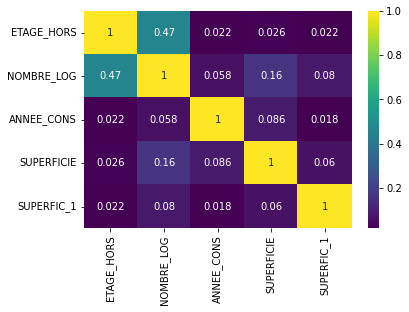

In [ ]:
sns.heatmap(property_assess_nu.corr(), annot = True, cmap = "viridis")

In [ ]:
# comment out given it takes > 6 min to run
#sns.pairplot(property_assess_nu)

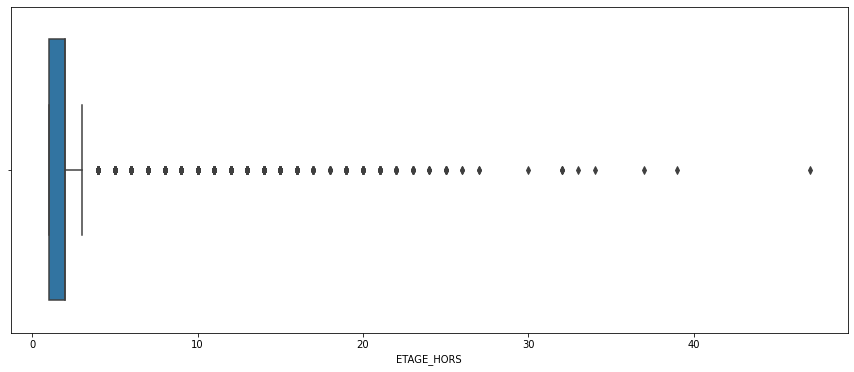

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x= "ETAGE_HORS", data = property_assess_nu)
#plt.xscale("log")
plt.xlabel("ETAGE_HORS")
plt.show()

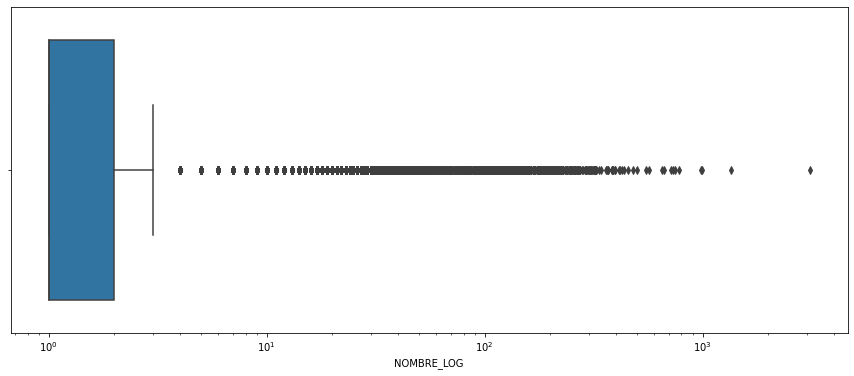

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x= "NOMBRE_LOG", data = property_assess_nu)
plt.xscale("log")
plt.xlabel("NOMBRE_LOG")
plt.show()

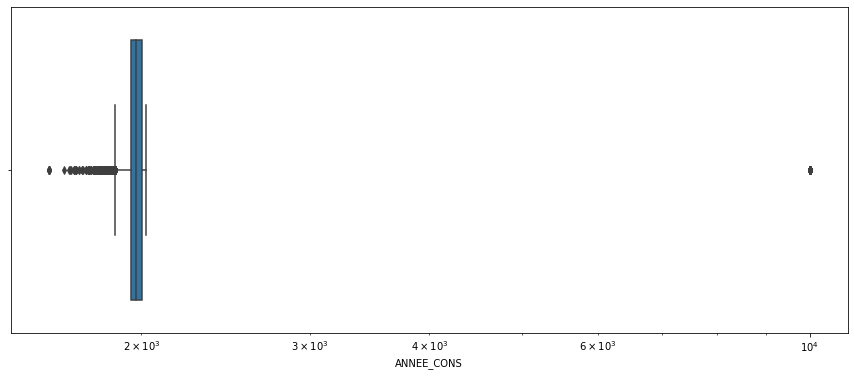

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x= "ANNEE_CONS", data = property_assess_nu)
plt.xscale("log")
plt.xlabel("ANNEE_CONS")
plt.show()

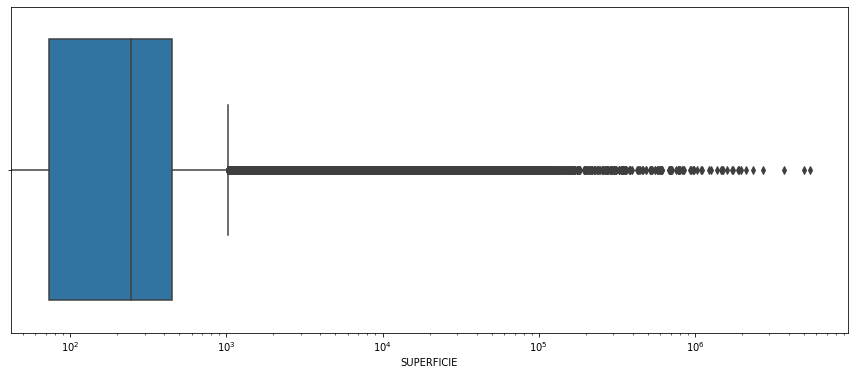

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x= "SUPERFICIE", data = property_assess_nu)
plt.xscale("log")
plt.xlabel("SUPERFICIE")
plt.show()

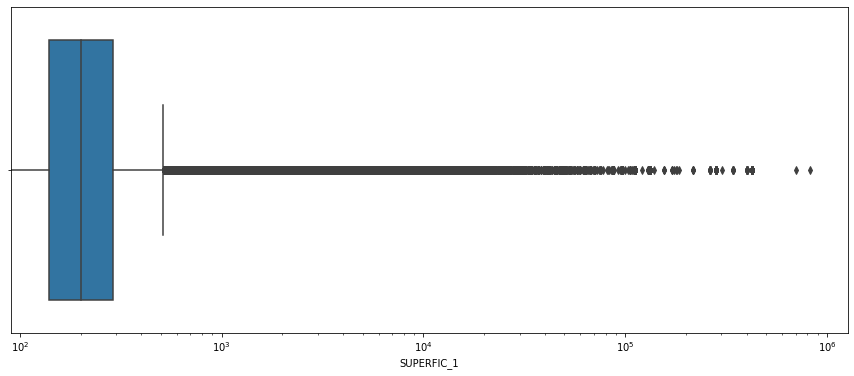

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x= "SUPERFIC_1", data = property_assess_nu)
plt.xscale("log")
plt.xlabel("SUPERFIC_1")
plt.show()

In [ ]:
property_assess_val_raw = property_assess.loc[:, ["ID_UEV", "ETAGE_HORS", "NOMBRE_LOG", "ANNEE_CONS", "CATEGORIE_", "SUPERFICIE", "SUPERFIC_1", "CentroidX", "CentroidY"]]
property_assess_val_raw.head(20)

,ID_UEV,ETAGE_HORS,NOMBRE_LOG,ANNEE_CONS,CATEGORIE_,SUPERFICIE,SUPERFIC_1,CentroidX,CentroidY
0,1045406,3.0,3.0,1912,Régulier,199.0,281.0,-73.571111,45.469207
1,1038232,1.0,1.0,1983,Condominium,76.0,2824.0,-73.588342,45.493879
2,2004842,2.0,1.0,1984,Régulier,382.0,127.0,-73.594972,45.632727
3,4007065,1.0,1.0,1934,Régulier,449.0,89.0,-73.791653,45.451050
4,1037770,3.0,6.0,1900,Régulier,178.0,354.0,-73.584549,45.490846
5,1037771,2.0,1.0,1900,Régulier,173.0,198.0,-73.584491,45.490895
6,1037773,2.0,1.0,1900,Régulier,166.0,189.0,-73.584435,45.490943
7,1049068,2.0,2.0,1875,Régulier,167.0,150.0,-73.577652,45.487195
8,3042297,2.0,2.0,1953,Régulier,349.0,206.0,-73.628383,45.514137
9,3035309,2.0,2.0,1936,Régulier,272.0,230.0,-73.626501,45.483587


In [ ]:
property_assess_val_raw["CATEGORIE_"].unique()

array(['Régulier', 'Condominium', 'Infrastructure'], dtype=object)

In [ ]:
property_assess_val_raw["ANNEE_CONS"].replace(to_replace = 9999, value = np.nan, inplace = True)

In [ ]:
property_assess_val_raw.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ID_UEV        4.006188e+06
ETAGE_HORS    2.000000e+00
NOMBRE_LOG    1.000000e+00
ANNEE_CONS    1.969000e+03
SUPERFICIE    2.440000e+02
SUPERFIC_1    2.010000e+02
CentroidX    -7.360896e+01
CentroidY     4.551418e+01
dtype: float64

In [ ]:
property_assess_val_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497937 entries, 0 to 497936
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID_UEV      497937 non-null  int64  
 1   ETAGE_HORS  446582 non-null  float64
 2   NOMBRE_LOG  451651 non-null  float64
 3   ANNEE_CONS  476092 non-null  float64
 4   CATEGORIE_  497937 non-null  object 
 5   SUPERFICIE  497936 non-null  float64
 6   SUPERFIC_1  358071 non-null  float64
 7   CentroidX   497937 non-null  float64
 8   CentroidY   497937 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 34.2+ MB


In [ ]:
property_assess_val = property_assess_val_raw.fillna(value = property_assess_val_raw.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
property_assess_val.describe(include = "all")

,ID_UEV,ETAGE_HORS,NOMBRE_LOG,ANNEE_CONS,CATEGORIE_,SUPERFICIE,SUPERFIC_1,CentroidX,CentroidY
count,4.979370e+05,497937.000000,497937.000000,497937.000000,497937,4.979370e+05,497937.000000,497937.000000,497937.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Régulier,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,318578,NaN,NaN,NaN,NaN
mean,3.480323e+06,1.722334,2.099607,1969.118471,NaN,8.133557e+02,650.637157,-73.638374,45.520936
std,1.454429e+06,0.776842,9.133075,32.720677,NaN,1.762828e+04,8024.580538,0.144562,0.088250
min,1.000002e+06,1.000000,1.000000,1600.000000,NaN,0.000000e+00,0.000000,-73.974446,0.000000
25%,2.080319e+06,1.000000,1.000000,1952.000000,NaN,7.300000e+01,166.000000,-73.671405,45.475165
50%,4.006188e+06,2.000000,1.000000,1969.000000,NaN,2.440000e+02,201.000000,-73.608960,45.514182
75%,5.085622e+06,2.000000,2.000000,1995.000000,NaN,4.510000e+02,242.000000,-73.569236,45.555149


In [ ]:
property_assess_val.head(20)

,ID_UEV,ETAGE_HORS,NOMBRE_LOG,ANNEE_CONS,CATEGORIE_,SUPERFICIE,SUPERFIC_1,CentroidX,CentroidY
0,1045406,3.0,3.0,1912.0,Régulier,199.0,281.0,-73.571111,45.469207
1,1038232,1.0,1.0,1983.0,Condominium,76.0,2824.0,-73.588342,45.493879
2,2004842,2.0,1.0,1984.0,Régulier,382.0,127.0,-73.594972,45.632727
3,4007065,1.0,1.0,1934.0,Régulier,449.0,89.0,-73.791653,45.451050
4,1037770,3.0,6.0,1900.0,Régulier,178.0,354.0,-73.584549,45.490846
5,1037771,2.0,1.0,1900.0,Régulier,173.0,198.0,-73.584491,45.490895
6,1037773,2.0,1.0,1900.0,Régulier,166.0,189.0,-73.584435,45.490943
7,1049068,2.0,2.0,1875.0,Régulier,167.0,150.0,-73.577652,45.487195
8,3042297,2.0,2.0,1953.0,Régulier,349.0,206.0,-73.628383,45.514137
9,3035309,2.0,2.0,1936.0,Régulier,272.0,230.0,-73.626501,45.483587


In [ ]:
one_hot_encoding = pd.get_dummies(property_assess_val, prefix_sep = "_", columns = ["CATEGORIE_"], drop_first = False)

In [ ]:
one_hot_encoding.head(10)

,ID_UEV,ETAGE_HORS,NOMBRE_LOG,ANNEE_CONS,SUPERFICIE,SUPERFIC_1,CentroidX,CentroidY,CATEGORIE__Condominium,CATEGORIE__Infrastructure,CATEGORIE__Régulier
0,1045406,3.0,3.0,1912.0,199.0,281.0,-73.571111,45.469207,0,0,1
1,1038232,1.0,1.0,1983.0,76.0,2824.0,-73.588342,45.493879,1,0,0
2,2004842,2.0,1.0,1984.0,382.0,127.0,-73.594972,45.632727,0,0,1
3,4007065,1.0,1.0,1934.0,449.0,89.0,-73.791653,45.451050,0,0,1
4,1037770,3.0,6.0,1900.0,178.0,354.0,-73.584549,45.490846,0,0,1
5,1037771,2.0,1.0,1900.0,173.0,198.0,-73.584491,45.490895,0,0,1
6,1037773,2.0,1.0,1900.0,166.0,189.0,-73.584435,45.490943,0,0,1
7,1049068,2.0,2.0,1875.0,167.0,150.0,-73.577652,45.487195,0,0,1
8,3042297,2.0,2.0,1953.0,349.0,206.0,-73.628383,45.514137,0,0,1
9,3035309,2.0,2.0,1936.0,272.0,230.0,-73.626501,45.483587,0,0,1


In [ ]:
property_assess_val = one_hot_encoding.rename(columns = {"CentroidX": "LONGITUDE",
                                                         "CentroidY": "LATITUDE",
                                                         "CATEGORIE__Condominium": "CATEGORIE__CONDOMINIUM",
                                                         "CATEGORIE__Infrastructure": "CATEGORIE__INFRASTRUCTURE",
                                                         "CATEGORIE__R�gulier": "CATEGORIE__REGULIER"})
property_assess_val.head()

,ID_UEV,ETAGE_HORS,NOMBRE_LOG,ANNEE_CONS,SUPERFICIE,SUPERFIC_1,LONGITUDE,LATITUDE,CATEGORIE__CONDOMINIUM,CATEGORIE__INFRASTRUCTURE,CATEGORIE__Régulier
0,1045406,3.0,3.0,1912.0,199.0,281.0,-73.571111,45.469207,0,0,1
1,1038232,1.0,1.0,1983.0,76.0,2824.0,-73.588342,45.493879,1,0,0
2,2004842,2.0,1.0,1984.0,382.0,127.0,-73.594972,45.632727,0,0,1
3,4007065,1.0,1.0,1934.0,449.0,89.0,-73.791653,45.451050,0,0,1
4,1037770,3.0,6.0,1900.0,178.0,354.0,-73.584549,45.490846,0,0,1


In [ ]:
filepath = userfolder + "/Data Processing/Output/" + name + "/property_assess_val.csv"
property_assess_val.to_csv(filepath, index = False)

# 4. Crime Data

#### Note for missing lat and long value, value 1 is assigned.  The record starts from 2015/01/01.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
crime_path = data_file_paths['crimes']
crime_data = pd.read_csv(crime_path, encoding = "ISO-8859-1", parse_dates = ["DATE"], infer_datetime_format = True)

In [ ]:
crime_data.duplicated().sum()

7343

In [ ]:
crime_data.shape

(210477, 8)

In [ ]:
crime_nodup = crime_data.drop_duplicates()

In [ ]:
crime_nodup.shape

(203134, 8)

In [ ]:
crime_nodup.head()

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122
3,Méfait,2017-07-21,jour,21.0,0.000000,0.000000e+00,-76.237290,0.000000
4,Méfait,2017-07-29,jour,12.0,0.000000,0.000000e+00,-76.237290,0.000000


In [ ]:
crime_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203134 entries, 0 to 210476
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   CATEGORIE  203134 non-null  object        
 1   DATE       203134 non-null  datetime64[ns]
 2   QUART      203134 non-null  object        
 3   PDQ        203130 non-null  float64       
 4   X          203134 non-null  float64       
 5   Y          203134 non-null  float64       
 6   LONGITUDE  203134 non-null  float64       
 7   LATITUDE   203134 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 13.9+ MB


In [ ]:
crime_nodup.describe(include = "all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE
count,203134,203134,203134,203130.000000,203134.000000,2.031340e+05,203134.000000,203134.000000
unique,6,2571,3,NaN,NaN,NaN,NaN,NaN
top,Vol dans / sur véhicule à moteur,2017-09-05 00:00:00,jour,NaN,NaN,NaN,NaN,NaN
freq,59578,149,103095,NaN,NaN,NaN,NaN,NaN
first,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-01-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,26.440708,248030.560925,4.228412e+06,-74.038543,38.172948
std,NaN,NaN,NaN,14.041681,109022.780581,1.856232e+06,0.967809,16.757558
min,NaN,NaN,NaN,1.000000,0.000000,0.000000e+00,-76.237290,0.000000
25%,NaN,NaN,NaN,15.000000,289052.700946,5.035431e+06,-73.701474,45.458661


In [ ]:
crime_nodup["CATEGORIE"].value_counts()

Vol dans / sur véhicule à moteur    59578
Introduction                        52762
Méfait                              45985
Vol de véhicule à moteur            32547
Vols qualifiés                      12071
Infractions entrainant la mort        191
Name: CATEGORIE, dtype: int64

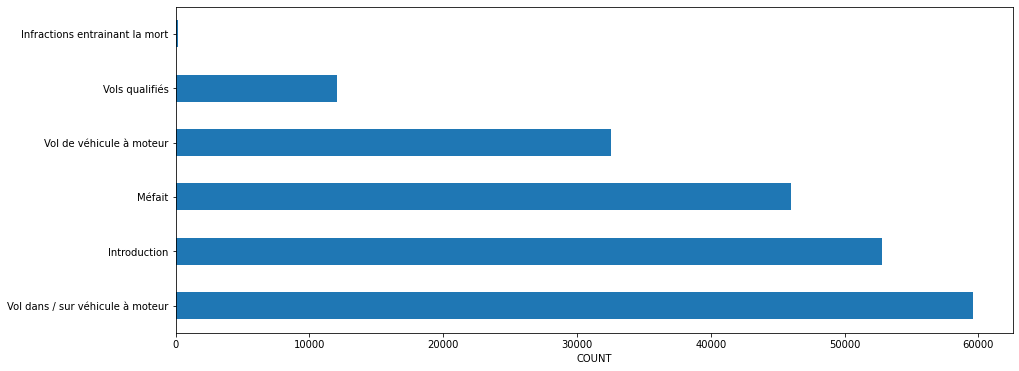

In [ ]:
plt.figure(figsize=(15,6))
crime_nodup["CATEGORIE"].value_counts().plot(kind = "barh")
plt.xlabel("COUNT")
plt.show()

In [ ]:
crime_nodup.loc[(crime_nodup["LONGITUDE"] == 1) & (crime_nodup["LATITUDE"] == 1)]

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE


In [ ]:
crime_nodup.loc[(crime_nodup["LATITUDE"] > 0.9999) & (crime_nodup["LATITUDE"] < 1.0001)]

,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE


In [ ]:
crime_nodup["YEAR"] = crime_nodup["DATE"].dt.year
crime_nodup.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CATEGORIE,DATE,QUART,PDQ,X,Y,LONGITUDE,LATITUDE,YEAR
0,Vol de véhicule à moteur,2018-09-13,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,2018
1,Vol de véhicule à moteur,2018-04-30,jour,30.0,294904.159001,5.047549e+06,-73.626778,45.567780,2018
2,Vol de véhicule à moteur,2018-09-01,nuit,7.0,290274.565000,5.042150e+06,-73.685928,45.519122,2018
3,Méfait,2017-07-21,jour,21.0,0.000000,0.000000e+00,-76.237290,0.000000,2017
4,Méfait,2017-07-29,jour,12.0,0.000000,0.000000e+00,-76.237290,0.000000,2017


In [ ]:
crime_15_19_raw = crime_nodup[(crime_nodup["YEAR"] >= 2015) & (crime_nodup["YEAR"] <= 2019)]
crime_15_19_raw.shape

(151481, 9)

In [ ]:
crime_15_19 = crime_15_19_raw.loc[:, ["CATEGORIE", "DATE", "QUART", "LONGITUDE", "LATITUDE", "YEAR"]]
crime_15_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151481 entries, 0 to 160248
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   CATEGORIE  151481 non-null  object        
 1   DATE       151481 non-null  datetime64[ns]
 2   QUART      151481 non-null  object        
 3   LONGITUDE  151481 non-null  float64       
 4   LATITUDE   151481 non-null  float64       
 5   YEAR       151481 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 8.1+ MB


In [ ]:
crime_15_19.describe(include = "all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,CATEGORIE,DATE,QUART,LONGITUDE,LATITUDE,YEAR
count,151481,151481,151481,151481.000000,151481.000000,151481.000000
unique,6,1826,3,NaN,NaN,NaN
top,Vol dans / sur véhicule à moteur,2017-09-05 00:00:00,jour,NaN,NaN,NaN
freq,44475,149,75972,NaN,NaN,NaN
first,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2019-12-31 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,-74.046152,38.045708,2016.863052
std,NaN,NaN,NaN,0.974318,16.873031,1.401982
min,NaN,NaN,NaN,-76.237290,0.000000,2015.000000
25%,NaN,NaN,NaN,-73.704251,45.457258,2016.000000


In [ ]:
crime_15_19["CATEGORIE"].replace(to_replace = {"M�fait": 1, 
                                               "Introduction": 2, 
                                               "Vol dans / sur v�hicule � moteur": 3, 
                                               "Vol de v�hicule � moteur": 4, 
                                               "Vols qualifi�s": 5,
                                               "Infractions entrainant la mort": 6}, inplace = True)

In [ ]:
crime_15_19["CATEGORIE"].unique()

array(['Vol de véhicule à moteur', 'Méfait', 'Vols qualifiés',
       'Vol dans / sur véhicule à moteur', 2, 6], dtype=object)

In [ ]:
crime_15_19 = pd.get_dummies(crime_15_19, prefix_sep = "_", columns = ["QUART"], drop_first = False)

In [ ]:
# crime_15_19 = crime_15_19.rename(columns = {"QUART_nuit": "QUART_NUIT", "QUART_soir": "QUART_SOIR"})
crime_15_19.head()

,CATEGORIE,DATE,LONGITUDE,LATITUDE,YEAR,QUART_jour,QUART_nuit,QUART_soir
0,Vol de véhicule à moteur,2018-09-13,-73.626778,45.567780,2018,1,0,0
1,Vol de véhicule à moteur,2018-04-30,-73.626778,45.567780,2018,1,0,0
2,Vol de véhicule à moteur,2018-09-01,-73.685928,45.519122,2018,0,1,0
3,Méfait,2017-07-21,-76.237290,0.000000,2017,1,0,0
4,Méfait,2017-07-29,-76.237290,0.000000,2017,1,0,0


In [ ]:
crime_15_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151481 entries, 0 to 160248
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CATEGORIE   151481 non-null  object        
 1   DATE        151481 non-null  datetime64[ns]
 2   LONGITUDE   151481 non-null  float64       
 3   LATITUDE    151481 non-null  float64       
 4   YEAR        151481 non-null  int64         
 5   QUART_jour  151481 non-null  uint8         
 6   QUART_nuit  151481 non-null  uint8         
 7   QUART_soir  151481 non-null  uint8         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1), uint8(3)
memory usage: 7.4+ MB


In [ ]:
crime_15_19.describe(include = "all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,CATEGORIE,DATE,LONGITUDE,LATITUDE,YEAR,QUART_jour,QUART_nuit,QUART_soir
count,151481,151481,151481.000000,151481.000000,151481.000000,151481.000000,151481.000000,151481.000000
unique,6,1826,NaN,NaN,NaN,NaN,NaN,NaN
top,Vol dans / sur véhicule à moteur,2017-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,44475,149,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-74.046152,38.045708,2016.863052,0.501528,0.151960,0.346512
std,NaN,NaN,0.974318,16.873031,1.401982,0.499999,0.358983,0.475860
min,NaN,NaN,-76.237290,0.000000,2015.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,-73.704251,45.457258,2016.000000,0.000000,0.000000,0.000000


In [ ]:
filepath = userfolder + "/Data Processing/Output/" + name + "/crime_15_19.csv"
crime_15_19.to_csv(filepath, index = False)

# 5. Census Data
Currently only need the shape file; calculated the area of each dissemination area in Alteryx.

# 6. 311 Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Year 2014 - 2015
path1_311 = r""+data_file_paths['311_2014_2015']
part1_311 = pd.read_csv(path1_311, parse_dates = ["DDS_DATE_CREATION"], infer_datetime_format = True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,3,4,5,6,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
part1_311.duplicated().sum()

133

In [ ]:
part1_311.shape

(1577199, 27)

In [ ]:
part1_311_nodup = part1_311.drop_duplicates()

In [ ]:
part1_311_nodup.shape

(1577066, 27)

In [ ]:
part1_311_nodup.head()

,ID_UNIQUE,NATURE,ACTI_NOM,TYPE_LIEU_INTERV,RUE,RUE_INTERSECTION1,RUE_INTERSECTION2,LOC_ERREUR_GDT,ARRONDISSEMENT,ARRONDISSEMENT_GEO,LIN_CODE_POSTAL,DDS_DATE_CREATION,PROVENANCE_ORIGINALE,PROVENANCE_TELEPHONE,PROVENANCE_COURRIEL,PROVENANCE_PERSONNE,PROVENANCE_COURRIER,PROVENANCE_TELECOPIEUR,PROVENANCE_INSTANCE,PROVENANCE_MOBILE,PROVENANCE_MEDIASOCIAUX,PROVENANCE_SITEINTERNET,UNITE_RESP_PARENT,LOC_LONG,LOC_LAT,LOC_X,LOC_Y
0,NaN,Information,Débris sur la voie publique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01 04:06:49,Téléphone,1,0,0,0,0,0,0,0,0,SEC.CENT.SERVICE.311,NaN,NaN,NaN,NaN
1,NaN,Information,Collecte des matières recyclables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01 09:02:14,Téléphone,1,0,0,0,0,0,0,0,0,LASALLE,NaN,NaN,NaN,NaN
2,NaN,Information,Collecte des matières recyclables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01 09:02:38,Téléphone,1,0,0,0,0,0,0,0,0,LASALLE,NaN,NaN,NaN,NaN
3,NaN,Information,Info-Remorquage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01 09:03:19,Téléphone,1,0,0,0,0,0,0,0,0,LASALLE,NaN,NaN,NaN,NaN
4,NaN,Information,Bureau d'arrondissement - Service à la clientèle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01 09:04:11,Téléphone,1,0,0,0,0,0,0,0,0,LASALLE,NaN,NaN,NaN,NaN


In [ ]:
part1_311_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1577066 entries, 0 to 1577198
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   ID_UNIQUE                689884 non-null   object        
 1   NATURE                   1577066 non-null  object        
 2   ACTI_NOM                 1577066 non-null  object        
 3   TYPE_LIEU_INTERV         689880 non-null   object        
 4   RUE                      555599 non-null   object        
 5   RUE_INTERSECTION1        114692 non-null   object        
 6   RUE_INTERSECTION2        114692 non-null   object        
 7   LOC_ERREUR_GDT           689880 non-null   float64       
 8   ARRONDISSEMENT           689880 non-null   object        
 9   ARRONDISSEMENT_GEO       689677 non-null   object        
 10  LIN_CODE_POSTAL          514645 non-null   object        
 11  DDS_DATE_CREATION        1577066 non-null  datetime64[ns]
 12  

In [ ]:
part1_311_nodup.describe(include = "all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,ID_UNIQUE,NATURE,ACTI_NOM,TYPE_LIEU_INTERV,RUE,RUE_INTERSECTION1,RUE_INTERSECTION2,LOC_ERREUR_GDT,ARRONDISSEMENT,ARRONDISSEMENT_GEO,LIN_CODE_POSTAL,DDS_DATE_CREATION,PROVENANCE_ORIGINALE,PROVENANCE_TELEPHONE,PROVENANCE_COURRIEL,PROVENANCE_PERSONNE,PROVENANCE_COURRIER,PROVENANCE_TELECOPIEUR,PROVENANCE_INSTANCE,PROVENANCE_MOBILE,PROVENANCE_MEDIASOCIAUX,PROVENANCE_SITEINTERNET,UNITE_RESP_PARENT,LOC_LONG,LOC_LAT,LOC_X,LOC_Y
count,689884,1577066,1577066,689880,555599,114692,114692,689880.000000,689880,689677,514645,1577066,1576003,1.577066e+06,1.577066e+06,1.577066e+06,1.577066e+06,1.577066e+06,1.577066e+06,1577066.0,1577066.0,1577066.0,1577066,689741.000000,689741.000000,689741.000000,6.897410e+05
unique,689884,4,1590,4,4491,3760,3923,NaN,34,33,32315,1516781,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,NaN,NaN,NaN,NaN
top,14-10072,Information,Taxes foncières,Adresse,boulevard Gouin,rue Sherbrooke,rue Sherbrooke,NaN,Saint-Laurent,Saint-Laurent,H8R3Y2,2015-08-04 10:57:59,Téléphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LASALLE,NaN,NaN,NaN,NaN
freq,1,887182,101149,567074,5761,2863,2911,NaN,92639,92601,449,5,1244350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255814,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01 00:23:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31 23:49:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071985,NaN,NaN,NaN,NaN,NaN,8.664285e-01,2.010886e-02,1.990900e-01,4.215423e-03,1.652436e-03,1.150237e-03,0.0,0.0,0.0,NaN,-73.616270,45.533152,295712.453746,5.043703e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258463,NaN,NaN,NaN,NaN,NaN,6.247347e-01,1.619898e-01,4.302718e-01,6.844440e-02,4.397474e-02,3.500008e-02,0.0,0.0,0.0,NaN,0.074340,0.315691,5989.709446,3.497232e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,NaN,-76.237290,0.000000,0.000007,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,NaN,-73.653383,45.500085,292823.764356,5.040042e+06


In [ ]:
part1_311_nodup["NATURE"].value_counts()

Information    887182
Requete        675484
Plainte         10293
Commentaire      4107
Name: NATURE, dtype: int64

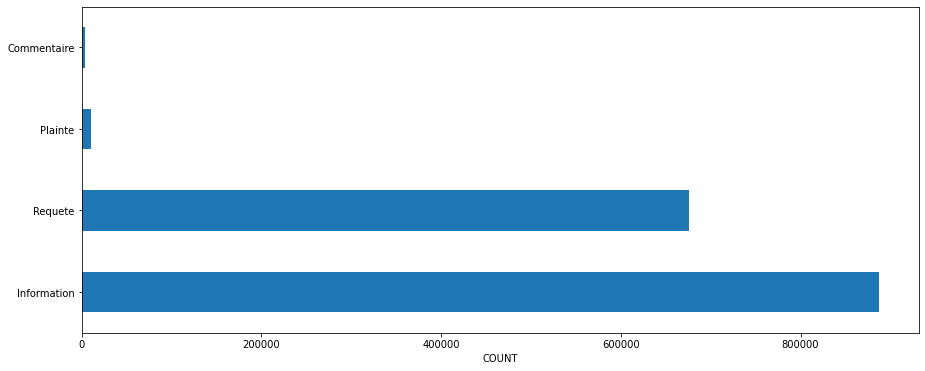

In [ ]:
plt.figure(figsize=(15,6))
part1_311_nodup["NATURE"].value_counts().plot(kind = "barh")
plt.xlabel("COUNT")
plt.show()

In [ ]:
part1_311_nodup["YEAR"] = part1_311_nodup["DDS_DATE_CREATION"].dt.year
part1_311_2015 = part1_311_nodup[(part1_311_nodup["YEAR"] >= 2015) & (part1_311_nodup["LOC_LONG"].notnull()) 
                                 & (part1_311_nodup["LOC_LAT"].notnull())]
part1_311_2015 = part1_311_2015.loc[:, ["ID_UNIQUE", "NATURE", "DDS_DATE_CREATION", "PROVENANCE_ORIGINALE", 
                                        "LOC_LONG", "LOC_LAT", "YEAR"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
part1_311_2015.head()

,ID_UNIQUE,NATURE,DDS_DATE_CREATION,PROVENANCE_ORIGINALE,LOC_LONG,LOC_LAT,YEAR
887458,15-358445,Requete,2015-12-31 23:49:57,Téléphone,-73.665037,45.511272,2015
887459,15-358444,Requete,2015-12-31 23:39:12,Téléphone,-73.799872,45.508653,2015
887460,15-358443,Requete,2015-12-31 23:07:31,Téléphone,-73.569573,45.566593,2015
887461,15-358442,Requete,2015-12-31 22:39:14,Téléphone,-73.580535,45.494563,2015
887462,15-358441,Requete,2015-12-31 22:18:15,Téléphone,-73.564225,45.527022,2015


In [ ]:
part1_311_2015.shape

(352713, 7)

In [ ]:
part1_311_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352713 entries, 887458 to 1240170
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID_UNIQUE             352713 non-null  object        
 1   NATURE                352713 non-null  object        
 2   DDS_DATE_CREATION     352713 non-null  datetime64[ns]
 3   PROVENANCE_ORIGINALE  352126 non-null  object        
 4   LOC_LONG              352713 non-null  float64       
 5   LOC_LAT               352713 non-null  float64       
 6   YEAR                  352713 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 21.5+ MB


In [ ]:
part1_311_2015["NATURE"].unique()

array(['Requete', 'Plainte', 'Commentaire'], dtype=object)

In [ ]:
part1_311_2015["PROVENANCE_ORIGINALE"].unique()

array(['Téléphone', 'Personne', 'Instance', 'Courriel', 'Courrier', nan,
       'Télécopieur'], dtype=object)

In [ ]:
part1_311_2015.describe(include = "all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,ID_UNIQUE,NATURE,DDS_DATE_CREATION,PROVENANCE_ORIGINALE,LOC_LONG,LOC_LAT,YEAR
count,352713,352713,352713,352126,352713.000000,352713.000000,352713.0
unique,352713,3,345939,6,NaN,NaN,NaN
top,15-358445,Requete,2015-01-09 09:01:00,Téléphone,NaN,NaN,NaN
freq,1,345290,4,248222,NaN,NaN,NaN
first,NaN,NaN,2015-01-01 01:06:16,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-12-31 23:49:57,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,-73.615600,45.533389,2015.0
std,NaN,NaN,NaN,NaN,0.073880,0.321615,0.0
min,NaN,NaN,NaN,NaN,-76.237290,0.000000,2015.0
25%,NaN,NaN,NaN,NaN,-73.651158,45.500209,2015.0


In [ ]:
part1_311_2015 = part1_311_2015.fillna("Unknown")
part1_311_2015["PROVENANCE_ORIGINALE"].unique()

array(['Téléphone', 'Personne', 'Instance', 'Courriel', 'Courrier',
       'Unknown', 'Télécopieur'], dtype=object)

In [ ]:
part1_311_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352713 entries, 887458 to 1240170
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID_UNIQUE             352713 non-null  object        
 1   NATURE                352713 non-null  object        
 2   DDS_DATE_CREATION     352713 non-null  datetime64[ns]
 3   PROVENANCE_ORIGINALE  352713 non-null  object        
 4   LOC_LONG              352713 non-null  float64       
 5   LOC_LAT               352713 non-null  float64       
 6   YEAR                  352713 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 21.5+ MB


In [ ]:
part1_311_2015 = pd.get_dummies(part1_311_2015, prefix_sep = "_", columns = ["NATURE", "PROVENANCE_ORIGINALE"], 
                                drop_first = False)
part1_311_2015.head()

,ID_UNIQUE,DDS_DATE_CREATION,LOC_LONG,LOC_LAT,YEAR,NATURE_Commentaire,NATURE_Plainte,NATURE_Requete,PROVENANCE_ORIGINALE_Courriel,PROVENANCE_ORIGINALE_Courrier,PROVENANCE_ORIGINALE_Instance,PROVENANCE_ORIGINALE_Personne,PROVENANCE_ORIGINALE_Télécopieur,PROVENANCE_ORIGINALE_Téléphone,PROVENANCE_ORIGINALE_Unknown
887458,15-358445,2015-12-31 23:49:57,-73.665037,45.511272,2015,0,0,1,0,0,0,0,0,1,0
887459,15-358444,2015-12-31 23:39:12,-73.799872,45.508653,2015,0,0,1,0,0,0,0,0,1,0
887460,15-358443,2015-12-31 23:07:31,-73.569573,45.566593,2015,0,0,1,0,0,0,0,0,1,0
887461,15-358442,2015-12-31 22:39:14,-73.580535,45.494563,2015,0,0,1,0,0,0,0,0,1,0
887462,15-358441,2015-12-31 22:18:15,-73.564225,45.527022,2015,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Year 2016 - Present
path2_311 = r""+data_file_paths['311']
part2_311 = pd.read_csv(path2_311, parse_dates = ["DDS_DATE_CREATION", "DATE_DERNIER_STATUT"], infer_datetime_format = True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,3,4,5,6,8,9,10,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
part2_311.duplicated().sum()

383

In [ ]:
part2_311.shape

(4611433, 29)

In [ ]:
part2_311_nodup = part2_311.drop_duplicates()

In [ ]:
part2_311_nodup.shape

(4611050, 29)

In [ ]:
part2_311_nodup.head()

,ID_UNIQUE,NATURE,ACTI_NOM,TYPE_LIEU_INTERV,RUE,RUE_INTERSECTION1,RUE_INTERSECTION2,LOC_ERREUR_GDT,ARRONDISSEMENT,ARRONDISSEMENT_GEO,LIN_CODE_POSTAL,DDS_DATE_CREATION,PROVENANCE_ORIGINALE,PROVENANCE_TELEPHONE,PROVENANCE_COURRIEL,PROVENANCE_PERSONNE,PROVENANCE_COURRIER,PROVENANCE_TELECOPIEUR,PROVENANCE_INSTANCE,PROVENANCE_MOBILE,PROVENANCE_MEDIASOCIAUX,PROVENANCE_SITEINTERNET,UNITE_RESP_PARENT,LOC_LONG,LOC_LAT,LOC_X,LOC_Y,DERNIER_STATUT,DATE_DERNIER_STATUT
0,NaN,Information,Feux de circulation - Entretien,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-10 08:48:01,Téléphone,1,0,0,0,0,0,0,0,0,SERVICE DE L EXPÉRIENCE CITOYENNE ET DES COMMU...,NaN,NaN,NaN,NaN,NaN,2019-11-10 08:48:01
1,NaN,Information,IRP - Fermeture de rue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-21 20:04:02,Téléphone,1,0,0,0,0,0,0,0,0,DIRECTION GÉNÉRALE,NaN,NaN,NaN,NaN,NaN,2018-01-21 20:04:02
2,NaN,Information,Nid-de-poule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-21 20:26:01,Téléphone,1,0,0,0,0,0,0,0,0,DIRECTION GÉNÉRALE,NaN,NaN,NaN,NaN,NaN,2018-01-21 20:26:01
3,NaN,Information,Eau - Divers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-22 00:03:17,Téléphone,1,0,0,0,0,0,0,0,0,DIRECTION GÉNÉRALE,NaN,NaN,NaN,NaN,NaN,2018-01-22 00:03:17
4,NaN,Information,Direction - Capital humain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-18 08:35:08,Téléphone,1,0,0,0,0,0,0,0,0,ST-LAURENT,NaN,NaN,NaN,NaN,NaN,2019-11-18 08:35:08


In [ ]:
part2_311_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4611050 entries, 0 to 4611432
Data columns (total 29 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   ID_UNIQUE                object        
 1   NATURE                   object        
 2   ACTI_NOM                 object        
 3   TYPE_LIEU_INTERV         object        
 4   RUE                      object        
 5   RUE_INTERSECTION1        object        
 6   RUE_INTERSECTION2        object        
 7   LOC_ERREUR_GDT           float64       
 8   ARRONDISSEMENT           object        
 9   ARRONDISSEMENT_GEO       object        
 10  LIN_CODE_POSTAL          object        
 11  DDS_DATE_CREATION        datetime64[ns]
 12  PROVENANCE_ORIGINALE     object        
 13  PROVENANCE_TELEPHONE     int64         
 14  PROVENANCE_COURRIEL      int64         
 15  PROVENANCE_PERSONNE      int64         
 16  PROVENANCE_COURRIER      int64         
 17  PROVENANCE_TELECOPIEUR   in

In [ ]:
part2_311_nodup.describe(include = "all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,ID_UNIQUE,NATURE,ACTI_NOM,TYPE_LIEU_INTERV,RUE,RUE_INTERSECTION1,RUE_INTERSECTION2,LOC_ERREUR_GDT,ARRONDISSEMENT,ARRONDISSEMENT_GEO,LIN_CODE_POSTAL,DDS_DATE_CREATION,PROVENANCE_ORIGINALE,PROVENANCE_TELEPHONE,PROVENANCE_COURRIEL,PROVENANCE_PERSONNE,PROVENANCE_COURRIER,PROVENANCE_TELECOPIEUR,PROVENANCE_INSTANCE,PROVENANCE_MOBILE,PROVENANCE_MEDIASOCIAUX,PROVENANCE_SITEINTERNET,UNITE_RESP_PARENT,LOC_LONG,LOC_LAT,LOC_X,LOC_Y,DERNIER_STATUT,DATE_DERNIER_STATUT
count,2268232,4611050,4611050,2268206,1883755,363739,363588,2.267569e+06,2268206,2267327,1735248,4611050,4606860,4.611050e+06,4.611050e+06,4.611050e+06,4.611050e+06,4.611050e+06,4.611050e+06,4.611050e+06,4.611050e+06,4.611050e+06,4611050,2.267471e+06,2.267471e+06,2.267471e+06,2.267471e+06,2268232,4611050
unique,2268232,4,1792,4,4806,4510,4604,NaN,36,34,34774,4424981,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,NaN,NaN,NaN,NaN,9,4271464
top,16-110025,Information,Permis animalier,Adresse,boulevard Gouin,rue Sherbrooke,rue Sherbrooke,NaN,Saint-Laurent,Saint-Laurent,H4M2M7,2016-06-01 10:26:06,Téléphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SERVICE DE L EXPÉRIENCE CITOYENNE ET DES COMMU...,NaN,NaN,NaN,NaN,Terminée,2020-07-09 09:29:01
freq,1,2342818,297647,1873613,19328,8225,8042,NaN,250023,249832,971,31,3521576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512916,NaN,NaN,NaN,NaN,1993374,94
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 00:42:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 01:38:08
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-02 21:57:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-03 00:29:21
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.475776e-02,NaN,NaN,NaN,NaN,NaN,8.439733e-01,2.840806e-02,2.041017e-01,3.060691e-03,1.949664e-04,6.352132e-04,1.162056e-02,7.980829e-05,6.208347e-03,NaN,-7.361712e+01,4.553310e+01,2.956499e+05,5.043696e+06,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.275069e-01,NaN,NaN,NaN,NaN,NaN,6.316651e-01,1.896281e-01,4.372180e-01,5.604172e-02,1.597556e-02,2.649603e-02,1.254405e-01,1.015992e-02,9.362092e-02,NaN,7.557844e-02,1.154403e-01,5.926488e+03,1.279557e+04,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,-7.623730e+01,-9.034000e-06,-9.999928e-01,-1.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,-7.365041e+01,4.549785e+01,2.930482e+05,5.039802e+06,NaN,NaN


In [ ]:
part2_311_nodup["NATURE"].value_counts()

Information    2342818
Requete        2209996
Plainte          34351
Commentaire      23885
Name: NATURE, dtype: int64

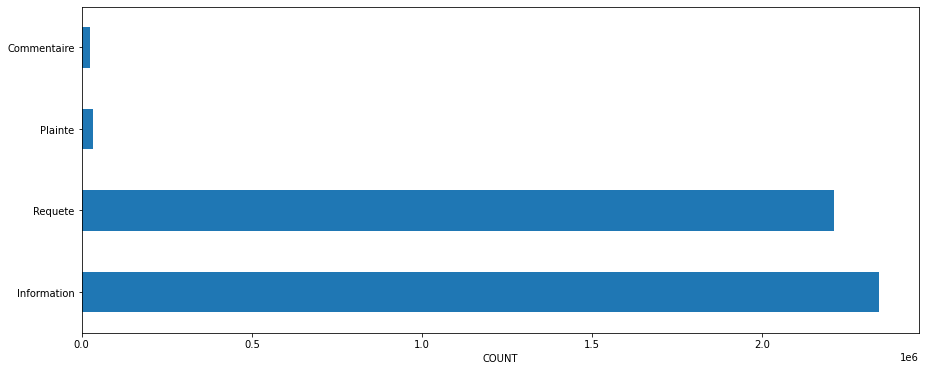

In [ ]:
plt.figure(figsize=(15,6))
part2_311_nodup["NATURE"].value_counts().plot(kind = "barh")
plt.xlabel("COUNT")
plt.show()

In [ ]:
part2_311_nodup["YEAR"] = part2_311_nodup["DDS_DATE_CREATION"].dt.year
part2_311_2016_2019 = part2_311_nodup[(part2_311_nodup["YEAR"] >= 2016) & (part2_311_nodup["YEAR"] <= 2019) 
                                      & (part2_311_nodup["LOC_LONG"].notnull()) & (part2_311_nodup["LOC_LAT"].notnull())]
part2_311_2016_2019 = part2_311_2016_2019.loc[:, ["ID_UNIQUE", "NATURE", "DDS_DATE_CREATION", "PROVENANCE_ORIGINALE", 
                                        "LOC_LONG", "LOC_LAT", "YEAR"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
part2_311_2016_2019.head()

,ID_UNIQUE,NATURE,DDS_DATE_CREATION,PROVENANCE_ORIGINALE,LOC_LONG,LOC_LAT,YEAR
3025548,19-99999,Requete,2019-03-20 16:48:38,Téléphone,-73.760687,45.479527,2019
3025549,19-99998,Requete,2019-03-20 16:48:36,Téléphone,-73.560447,45.529108,2019
3025550,19-99996,Requete,2019-03-20 16:46:29,Téléphone,-73.534904,45.558151,2019
3025551,19-99995,Requete,2019-03-20 16:45:32,Téléphone,-73.627904,45.573485,2019
3025552,19-99994,Requete,2019-03-20 16:45:03,Téléphone,-73.625155,45.530480,2019


In [ ]:
part2_311_2016_2019.shape

(1585873, 7)

In [ ]:
part2_311_2016_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585873 entries, 3025548 to 4611432
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ID_UNIQUE             1585873 non-null  object        
 1   NATURE                1585873 non-null  object        
 2   DDS_DATE_CREATION     1585873 non-null  datetime64[ns]
 3   PROVENANCE_ORIGINALE  1582849 non-null  object        
 4   LOC_LONG              1585873 non-null  float64       
 5   LOC_LAT               1585873 non-null  float64       
 6   YEAR                  1585873 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 96.8+ MB


In [ ]:
part2_311_2016_2019["PROVENANCE_ORIGINALE"].unique()

array(['Téléphone', 'Personne', 'Instance', 'Internet', 'Mobile',
       'Courriel', 'Courrier', nan, 'Médias sociaux', 'Télécopieur'],
      dtype=object)

In [ ]:
part2_311_2016_2019.describe(include = "all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,ID_UNIQUE,NATURE,DDS_DATE_CREATION,PROVENANCE_ORIGINALE,LOC_LONG,LOC_LAT,YEAR
count,1585873,1585873,1585873,1582849,1.585873e+06,1.585873e+06,1.585873e+06
unique,1585873,3,1554855,9,NaN,NaN,NaN
top,19-99999,Requete,2016-06-01 10:26:06,Téléphone,NaN,NaN,NaN
freq,1,1550753,31,1016850,NaN,NaN,NaN
first,NaN,NaN,2016-01-01 00:42:30,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-12-31 23:13:39,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,-7.361674e+01,4.553351e+01,2.017496e+03
std,NaN,NaN,NaN,NaN,7.601424e-02,1.333425e-01,1.111340e+00
min,NaN,NaN,NaN,NaN,-7.623730e+01,-9.034000e-06,2.016000e+03
25%,NaN,NaN,NaN,NaN,-7.365122e+01,4.549754e+01,2.017000e+03


In [ ]:
part2_311_2016_2019 = part2_311_2016_2019.fillna("Unknown")
part2_311_2016_2019["PROVENANCE_ORIGINALE"].unique()

array(['Téléphone', 'Personne', 'Instance', 'Internet', 'Mobile',
       'Courriel', 'Courrier', 'Unknown', 'Médias sociaux', 'Télécopieur'],
      dtype=object)

In [ ]:
part2_311_2016_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585873 entries, 3025548 to 4611432
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ID_UNIQUE             1585873 non-null  object        
 1   NATURE                1585873 non-null  object        
 2   DDS_DATE_CREATION     1585873 non-null  datetime64[ns]
 3   PROVENANCE_ORIGINALE  1585873 non-null  object        
 4   LOC_LONG              1585873 non-null  float64       
 5   LOC_LAT               1585873 non-null  float64       
 6   YEAR                  1585873 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 96.8+ MB


In [ ]:
part2_311_2016_2019 = pd.get_dummies(part2_311_2016_2019, prefix_sep = "_", columns = ["NATURE", "PROVENANCE_ORIGINALE"], 
                                drop_first = False)
part2_311_2016_2019.head()

,ID_UNIQUE,DDS_DATE_CREATION,LOC_LONG,LOC_LAT,YEAR,NATURE_Commentaire,NATURE_Plainte,NATURE_Requete,PROVENANCE_ORIGINALE_Courriel,PROVENANCE_ORIGINALE_Courrier,PROVENANCE_ORIGINALE_Instance,PROVENANCE_ORIGINALE_Internet,PROVENANCE_ORIGINALE_Mobile,PROVENANCE_ORIGINALE_Médias sociaux,PROVENANCE_ORIGINALE_Personne,PROVENANCE_ORIGINALE_Télécopieur,PROVENANCE_ORIGINALE_Téléphone,PROVENANCE_ORIGINALE_Unknown
3025548,19-99999,2019-03-20 16:48:38,-73.760687,45.479527,2019,0,0,1,0,0,0,0,0,0,0,0,1,0
3025549,19-99998,2019-03-20 16:48:36,-73.560447,45.529108,2019,0,0,1,0,0,0,0,0,0,0,0,1,0
3025550,19-99996,2019-03-20 16:46:29,-73.534904,45.558151,2019,0,0,1,0,0,0,0,0,0,0,0,1,0
3025551,19-99995,2019-03-20 16:45:32,-73.627904,45.573485,2019,0,0,1,0,0,0,0,0,0,0,0,1,0
3025552,19-99994,2019-03-20 16:45:03,-73.625155,45.530480,2019,0,0,1,0,0,0,0,0,0,0,0,1,0


#### Create Internet, Mobile and Médias sociaux clos with 0 valiie in Part I table to join the Part II table properly

In [ ]:
part1_311_2015["PROVENANCE_ORIGINALE_Internet"] = 0
part1_311_2015["PROVENANCE_ORIGINALE_Mobile"] = 0
part1_311_2015["PROVENANCE_ORIGINALE_Médias sociaux"] = 0
part1_311_2015.head()

,ID_UNIQUE,DDS_DATE_CREATION,LOC_LONG,LOC_LAT,YEAR,NATURE_Commentaire,NATURE_Plainte,NATURE_Requete,PROVENANCE_ORIGINALE_Courriel,PROVENANCE_ORIGINALE_Courrier,PROVENANCE_ORIGINALE_Instance,PROVENANCE_ORIGINALE_Personne,PROVENANCE_ORIGINALE_Télécopieur,PROVENANCE_ORIGINALE_Téléphone,PROVENANCE_ORIGINALE_Unknown,PROVENANCE_ORIGINALE_Internet,PROVENANCE_ORIGINALE_Mobile,PROVENANCE_ORIGINALE_Médias sociaux
887458,15-358445,2015-12-31 23:49:57,-73.665037,45.511272,2015,0,0,1,0,0,0,0,0,1,0,0,0,0
887459,15-358444,2015-12-31 23:39:12,-73.799872,45.508653,2015,0,0,1,0,0,0,0,0,1,0,0,0,0
887460,15-358443,2015-12-31 23:07:31,-73.569573,45.566593,2015,0,0,1,0,0,0,0,0,1,0,0,0,0
887461,15-358442,2015-12-31 22:39:14,-73.580535,45.494563,2015,0,0,1,0,0,0,0,0,1,0,0,0,0
887462,15-358441,2015-12-31 22:18:15,-73.564225,45.527022,2015,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
part1_311_2015 = part1_311_2015.astype({"PROVENANCE_ORIGINALE_Internet": "uint8", "PROVENANCE_ORIGINALE_Mobile": "uint8", "PROVENANCE_ORIGINALE_Médias sociaux": "uint8"})

In [ ]:
part1_311_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352713 entries, 887458 to 1240170
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ID_UNIQUE                            352713 non-null  object        
 1   DDS_DATE_CREATION                    352713 non-null  datetime64[ns]
 2   LOC_LONG                             352713 non-null  float64       
 3   LOC_LAT                              352713 non-null  float64       
 4   YEAR                                 352713 non-null  int64         
 5   NATURE_Commentaire                   352713 non-null  uint8         
 6   NATURE_Plainte                       352713 non-null  uint8         
 7   NATURE_Requete                       352713 non-null  uint8         
 8   PROVENANCE_ORIGINALE_Courriel        352713 non-null  uint8         
 9   PROVENANCE_ORIGINALE_Courrier        352713 non-null  uint8     

In [ ]:
part2_311_2016_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585873 entries, 3025548 to 4611432
Data columns (total 18 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   ID_UNIQUE                            1585873 non-null  object        
 1   DDS_DATE_CREATION                    1585873 non-null  datetime64[ns]
 2   LOC_LONG                             1585873 non-null  float64       
 3   LOC_LAT                              1585873 non-null  float64       
 4   YEAR                                 1585873 non-null  int64         
 5   NATURE_Commentaire                   1585873 non-null  uint8         
 6   NATURE_Plainte                       1585873 non-null  uint8         
 7   NATURE_Requete                       1585873 non-null  uint8         
 8   PROVENANCE_ORIGINALE_Courriel        1585873 non-null  uint8         
 9   PROVENANCE_ORIGINALE_Courrier        1585873 non-nu

In [ ]:
val_311_15_19 = pd.concat([part1_311_2015, part2_311_2016_2019], ignore_index = True)

In [ ]:
val_311_15_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938586 entries, 0 to 1938585
Data columns (total 18 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   ID_UNIQUE                            object        
 1   DDS_DATE_CREATION                    datetime64[ns]
 2   LOC_LONG                             float64       
 3   LOC_LAT                              float64       
 4   YEAR                                 int64         
 5   NATURE_Commentaire                   uint8         
 6   NATURE_Plainte                       uint8         
 7   NATURE_Requete                       uint8         
 8   PROVENANCE_ORIGINALE_Courriel        uint8         
 9   PROVENANCE_ORIGINALE_Courrier        uint8         
 10  PROVENANCE_ORIGINALE_Instance        uint8         
 11  PROVENANCE_ORIGINALE_Personne        uint8         
 12  PROVENANCE_ORIGINALE_Télécopieur     uint8         
 13  PROVENANCE_ORIGINALE_Téléph

In [ ]:
val_311_15_19.describe(include = "all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,ID_UNIQUE,DDS_DATE_CREATION,LOC_LONG,LOC_LAT,YEAR,NATURE_Commentaire,NATURE_Plainte,NATURE_Requete,PROVENANCE_ORIGINALE_Courriel,PROVENANCE_ORIGINALE_Courrier,PROVENANCE_ORIGINALE_Instance,PROVENANCE_ORIGINALE_Personne,PROVENANCE_ORIGINALE_Télécopieur,PROVENANCE_ORIGINALE_Téléphone,PROVENANCE_ORIGINALE_Unknown,PROVENANCE_ORIGINALE_Internet,PROVENANCE_ORIGINALE_Mobile,PROVENANCE_ORIGINALE_Médias sociaux
count,1938586,1938586,1.938586e+06,1.938586e+06,1.938586e+06,1.938586e+06,1.938586e+06,1.938586e+06,1.938586e+06,1.938586e+06,1.938586e+06,1.938586e+06,1.938586e+06,1.938586e+06,1.938586e+06,1.938586e+06,1.938586e+06,1.938586e+06
unique,1938586,1900794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,15-358445,2016-06-01 10:26:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2015-01-01 01:06:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-31 23:13:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-7.361654e+01,4.553349e+01,2.017042e+03,7.797952e-03,1.414742e-02,9.780546e-01,3.801998e-02,5.684556e-03,1.496452e-03,2.850052e-01,6.901938e-04,6.525746e-01,1.862698e-03,3.163646e-03,1.143669e-02,6.602751e-05
std,NaN,NaN,7.563165e-02,1.826602e-01,1.391929e+00,8.796106e-02,1.180986e-01,1.465052e-01,1.912446e-01,7.518141e-02,3.865505e-02,4.514170e-01,2.626248e-02,4.761524e-01,4.311878e-02,5.615727e-02,1.063292e-01,8.125465e-03
min,NaN,NaN,-7.623730e+01,-9.034000e-06,2.015000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,-7.365122e+01,4.549797e+01,2.016000e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
val_311_15_19.head()

,ID_UNIQUE,DDS_DATE_CREATION,LOC_LONG,LOC_LAT,YEAR,NATURE_Commentaire,NATURE_Plainte,NATURE_Requete,PROVENANCE_ORIGINALE_Courriel,PROVENANCE_ORIGINALE_Courrier,PROVENANCE_ORIGINALE_Instance,PROVENANCE_ORIGINALE_Personne,PROVENANCE_ORIGINALE_Télécopieur,PROVENANCE_ORIGINALE_Téléphone,PROVENANCE_ORIGINALE_Unknown,PROVENANCE_ORIGINALE_Internet,PROVENANCE_ORIGINALE_Mobile,PROVENANCE_ORIGINALE_Médias sociaux
0,15-358445,2015-12-31 23:49:57,-73.665037,45.511272,2015,0,0,1,0,0,0,0,0,1,0,0,0,0
1,15-358444,2015-12-31 23:39:12,-73.799872,45.508653,2015,0,0,1,0,0,0,0,0,1,0,0,0,0
2,15-358443,2015-12-31 23:07:31,-73.569573,45.566593,2015,0,0,1,0,0,0,0,0,1,0,0,0,0
3,15-358442,2015-12-31 22:39:14,-73.580535,45.494563,2015,0,0,1,0,0,0,0,0,1,0,0,0,0
4,15-358441,2015-12-31 22:18:15,-73.564225,45.527022,2015,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
val_311_15_19.tail()

,ID_UNIQUE,DDS_DATE_CREATION,LOC_LONG,LOC_LAT,YEAR,NATURE_Commentaire,NATURE_Plainte,NATURE_Requete,PROVENANCE_ORIGINALE_Courriel,PROVENANCE_ORIGINALE_Courrier,PROVENANCE_ORIGINALE_Instance,PROVENANCE_ORIGINALE_Personne,PROVENANCE_ORIGINALE_Télécopieur,PROVENANCE_ORIGINALE_Téléphone,PROVENANCE_ORIGINALE_Unknown,PROVENANCE_ORIGINALE_Internet,PROVENANCE_ORIGINALE_Mobile,PROVENANCE_ORIGINALE_Médias sociaux
1938581,13-338877-A,2018-11-20 13:19:11,-73.619193,45.543890,2018,0,0,1,0,0,0,0,0,0,1,0,0,0
1938582,13-317913-B,2016-10-21 14:49:39,-73.643081,45.559319,2016,0,0,1,0,0,0,0,0,0,1,0,0,0
1938583,13-313550-C,2018-04-12 09:43:46,-73.659221,45.542706,2018,0,0,1,0,0,0,0,0,0,1,0,0,0
1938584,13-313550-B,2016-09-01 14:51:04,-73.659221,45.542706,2016,0,0,1,0,0,0,0,0,0,1,0,0,0
1938585,10-182618-A,2016-11-29 10:03:07,-73.619035,45.536318,2016,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
filepath = userfolder + "/Data Processing/Output/" + name + "/val_311_15_19.csv" 
val_311_15_19.to_csv(filepath, index = False)